# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.special import expit
import shap

DATA_PATH = "/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv(DATA_PATH)
df.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
df.tail(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1455,40,No,Travel_Rarely,1322,Research & Development,2,4,Life Sciences,1,2048,...,4,80,0,8,2,3,2,2,2,2
1456,35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,...,4,80,2,10,2,4,10,2,0,2
1457,40,No,Travel_Rarely,1194,Research & Development,2,4,Medical,1,2051,...,2,80,3,20,2,3,5,3,0,2
1458,35,No,Travel_Rarely,287,Research & Development,1,4,Life Sciences,1,2052,...,4,80,1,4,5,3,4,3,1,1
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


## Detecting Null Values

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Detecting Outliers

In [10]:
df["Attrition_num"] = df["Attrition"].map({"Yes": 1, "No": 0})
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns


In [11]:
outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]

    outlier_summary.append({
        "column": col,
        "outlier_count": outliers,
        "outlier_ratio": outliers / len(df)
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df.sort_values("outlier_ratio", ascending=False)
outlier_df


,column,outlier_count,outlier_ratio
0,Age,0,0.000000
1,DailyRate,0,0.000000
2,DistanceFromHome,0,0.000000
3,Education,0,0.000000
4,EmployeeCount,0,0.000000
5,EmployeeNumber,0,0.000000
6,EnvironmentSatisfaction,0,0.000000
7,HourlyRate,0,0.000000
8,JobInvolvement,0,0.000000
9,JobLevel,0,0.000000


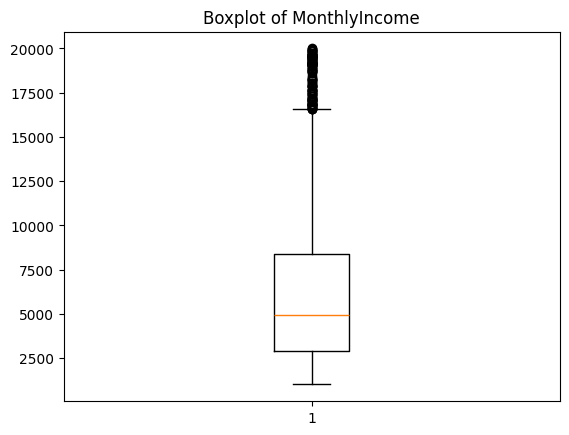

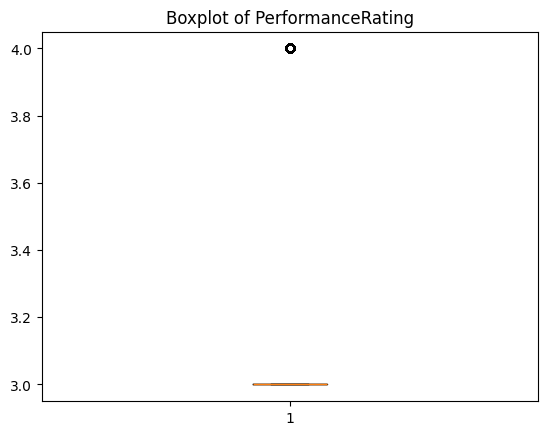

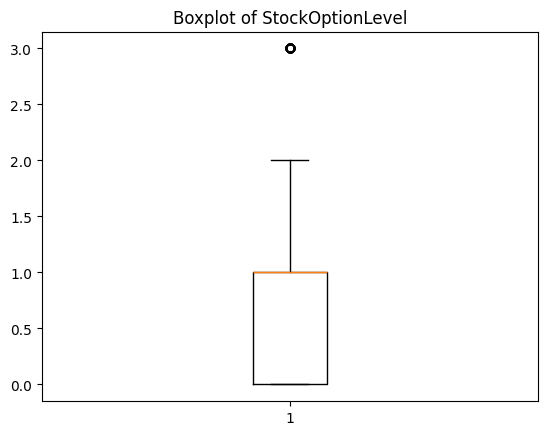

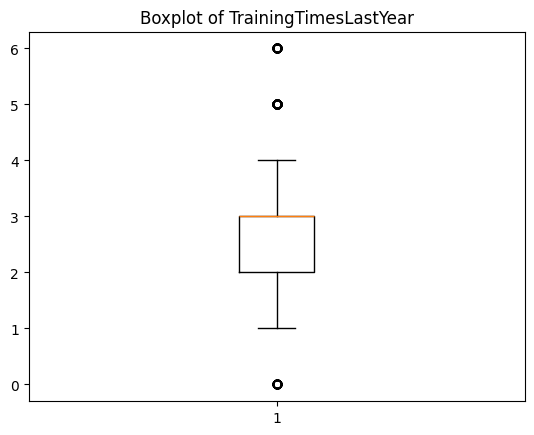

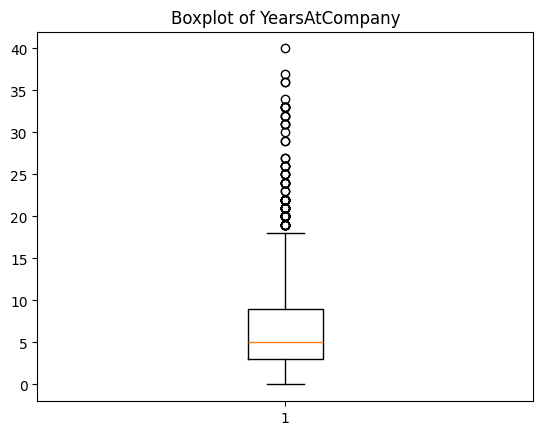

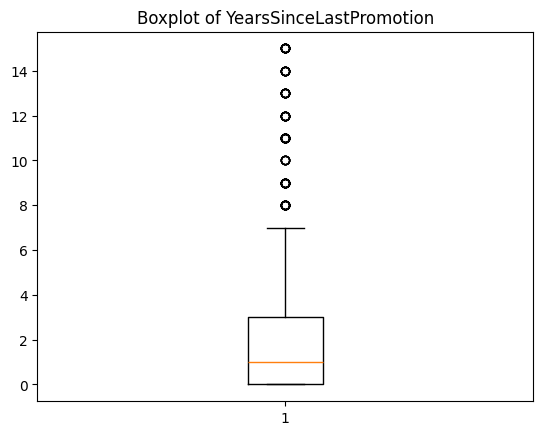

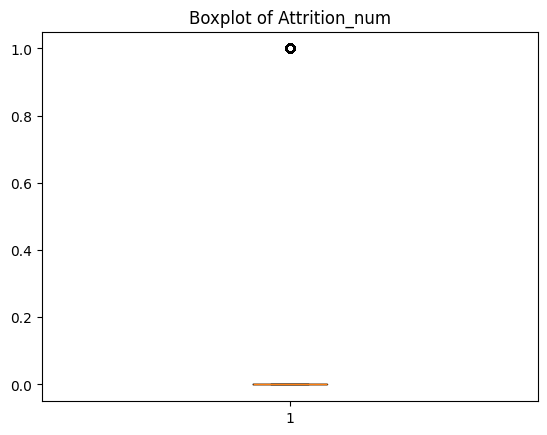

In [12]:
cols_with_outliers = outlier_df.loc[
    outlier_df["outlier_ratio"] > 0.05, "column"
]
for col in cols_with_outliers:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.show()

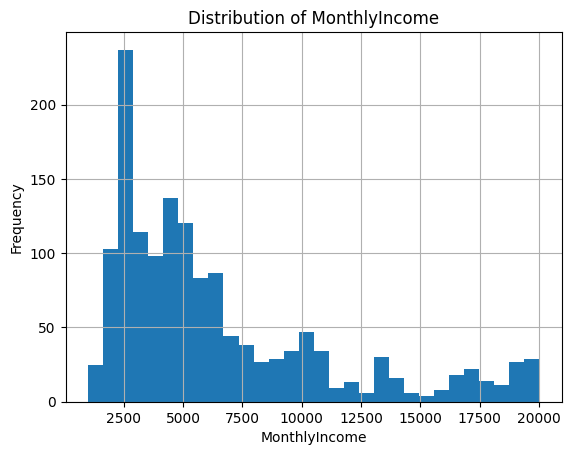

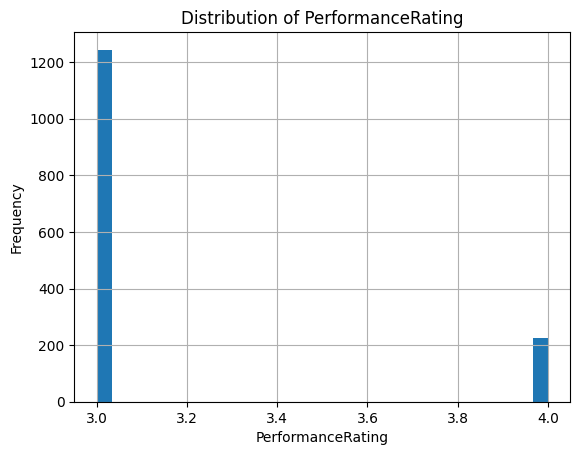

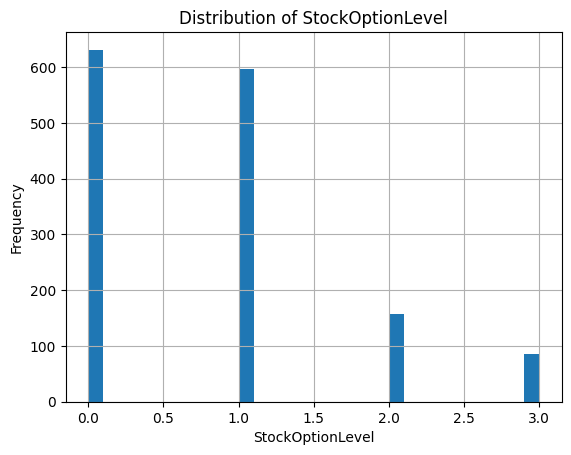

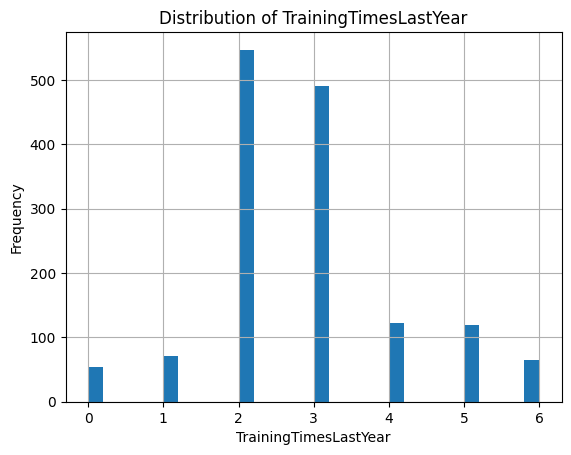

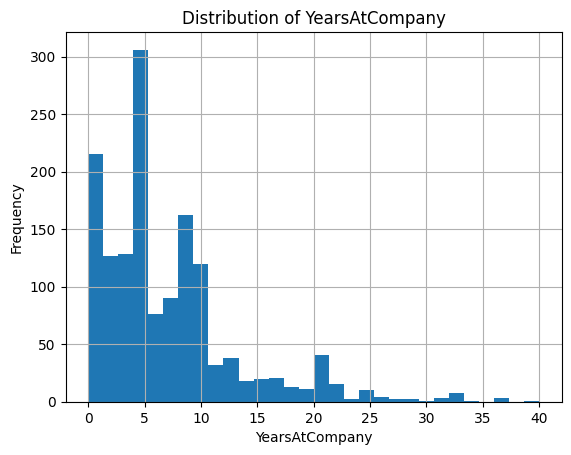

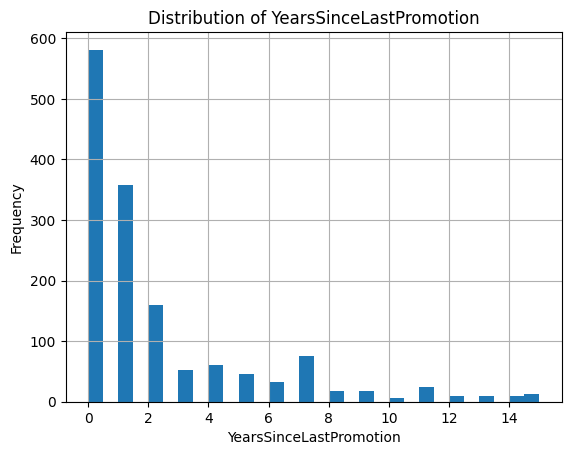

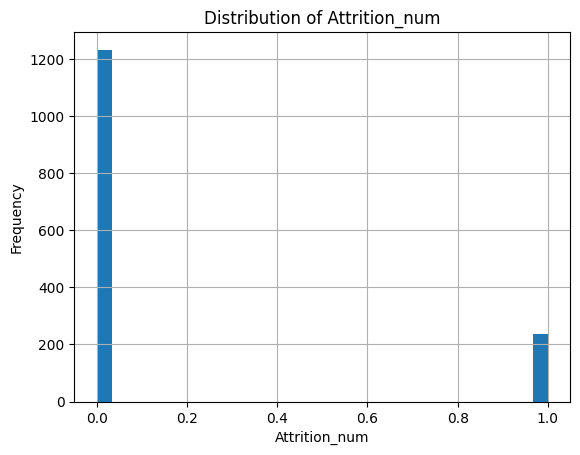

In [13]:
for col in cols_with_outliers:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Correlation with Numerical Columns

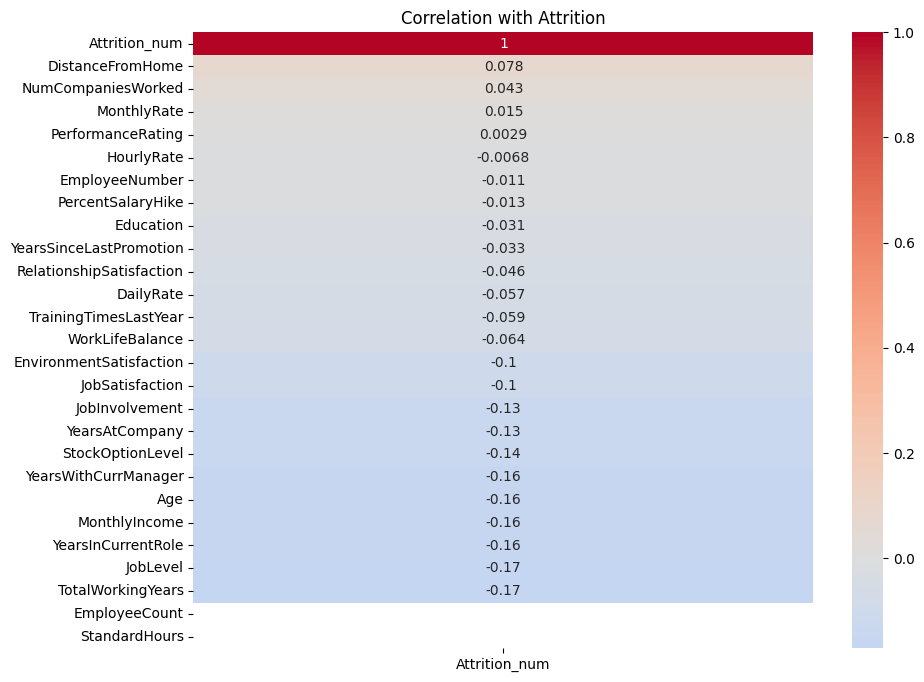

In [14]:
corr_df = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_df[["Attrition_num"]].sort_values("Attrition_num", ascending=False),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation with Attrition")
plt.show()

## Correlation with Categorical Columns

/tmp/ipykernel_17/2396844624.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(k-1, r-1))))


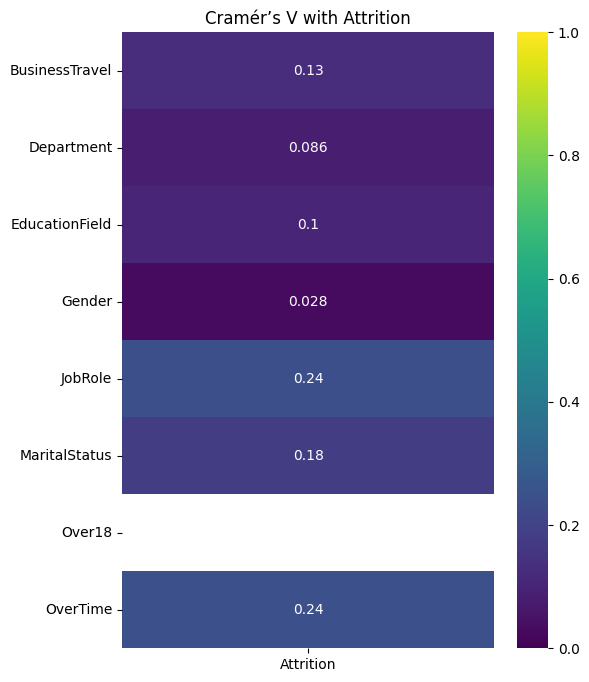

In [15]:
def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    r, k = confusion.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))
cat_cols_no_target = [c for c in cat_cols if c != "Attrition"]

cramer_matrix = pd.DataFrame(
    index=cat_cols_no_target,
    columns=["Attrition"]
)

for col in cat_cols_no_target:
    cramer_matrix.loc[col, "Attrition"] = cramers_v(
        df[col], df["Attrition"]
    )

cramer_matrix = cramer_matrix.astype(float)
plt.figure(figsize=(6, 8))
sns.heatmap(
    cramer_matrix,
    annot=True,
    cmap="viridis",
    vmin=0,
    vmax=1
)
plt.title("Cramér’s V with Attrition")
plt.show()

# Data Prepration

## Delete Unnecessary Columns 

In [17]:
df = df.drop(columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber", "Attrition"])

## Feature Engineering

### Ratio Features

In [18]:
df["Income_per_Year"] = df["MonthlyIncome"] / (df["TotalWorkingYears"] + 1)
df["Income_per_CompanyYear"] = df["MonthlyIncome"] / (df["YearsAtCompany"] + 1)
df["Tenure_Ratio"] = df["YearsAtCompany"] / (df["TotalWorkingYears"] + 1)


### Career Features (Promotion and Role Stagnation)

In [19]:
df["Promotion_Delay"] = (
    df["YearsSinceLastPromotion"] > 3
).astype(int)

df["Role_Stagnation"] = (
    df["YearsInCurrentRole"] > 5
).astype(int)


### Segmentations (Age, Company Years)

In [20]:
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[15, 25, 35, 45, 60],
    labels=["Junior", "EarlyMid", "Mid", "Senior"]
)
df["Tenure_Group"] = pd.cut(
    df["YearsAtCompany"],
    bins=[-1, 2, 5, 10, 40],
    labels=["New", "Early", "Mid", "Long"]
)


### Log Transforms for High Skewness Columns

In [21]:
df["Log_MonthlyIncome"] = np.log1p(df["MonthlyIncome"])
df["Log_MonthlyRate"] = np.log1p(df["MonthlyRate"])


### Satisfaction Features

In [22]:
df["Low_JobSatisfaction"] = (df["JobSatisfaction"] <= 2).astype(int)
df["Low_WorkLife"] = (df["WorkLifeBalance"] <= 2).astype(int)
df["Low_EnvSatisfaction"] = (df["EnvironmentSatisfaction"] <= 2).astype(int)
df["Satisfaction_Interaction"] = (
    df["JobSatisfaction"] *
    df["WorkLifeBalance"] *
    df["EnvironmentSatisfaction"]
)


### Overqualification Feature

In [23]:
df["Overqualified"] = (
    (df["Education"] >= 4) &
    (df["JobLevel"] <= 2)
).astype(int)


## Encoding

Before encoding applying train test split is a must for ensure there is no data leakage.

In [24]:

y = df['Attrition_num']
X = df.drop(columns=['Attrition_num'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,Role_Stagnation,Age_Group,Tenure_Group,Log_MonthlyIncome,Log_MonthlyRate,Low_JobSatisfaction,Low_WorkLife,Low_EnvSatisfaction,Satisfaction_Interaction,Overqualified
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,0,Mid,Mid,8.698514,9.877144,0,1,1,8,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,1,Senior,Mid,8.543056,10.122944,1,0,0,18,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,0,Mid,New,7.645398,7.781973,0,0,0,36,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,1,EarlyMid,Mid,7.975908,10.050182,0,0,0,36,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,0,EarlyMid,New,8.151622,9.719144,1,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,0,Mid,Early,7.852439,9.416623,0,0,0,36,0
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,1,Mid,Mid,9.209540,9.973853,1,0,0,12,0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,0,EarlyMid,Mid,8.723069,8.551595,1,0,1,12,0
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,1,Senior,Mid,8.592486,9.491300,1,1,0,16,0


### Encoding for Categorical Columns

In [26]:
"""
We will apply different encoding processes to different types of columns. To do this, we need to know which categorical columns are nominal, 
which are ordinal, which are high cardinality, and which are low cardinality. 

Ordinal Col -> Ordinal Encoding

Nominal Col -|
             |
-------------------------
|                      |
High Cardinality       Low Cardinality
|                      |
Target Encoding        One Hot Encoding
"""

'\nWe will apply different encoding processes to different types of columns. To do this, we need to know which categorical columns are nominal, \nwhich are ordinal, which are high cardinality, and which are low cardinality. \n\nOrdinal Col -> Ordinal Encoding\n\nNominal Col -|\n             |\n-------------------------\n|                      |\nHigh Cardinality       Low Cardinality\n|                      |\nTarget Encoding        One Hot Encoding\n'

In [27]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

In [28]:
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Age_Group', 'Tenure_Group'],
      dtype='object')

In [29]:
ordinal_cols = ['BusinessTravel', 'Age_Group', 'Tenure_Group']
nominal_cols = ['Department', 'EducationField', 'OverTime', 'Gender', 'JobRole', 'MaritalStatus']

In [30]:
cardinality = X[nominal_cols].nunique()
high_cardinality_cols = cardinality[cardinality > 10].index.tolist()
low_cardinality_cols = cardinality[cardinality <= 10].index.tolist()
high_cardinality_cols

[]

In [31]:
low_cardinality_cols

['Department',
 'EducationField',
 'OverTime',
 'Gender',
 'JobRole',
 'MaritalStatus']

### Ordinal Encoding

In [32]:
ord_encoder = OrdinalEncoder()
X_train[ordinal_cols] = ord_encoder.fit_transform(X_train[ordinal_cols])
X_test[ordinal_cols] = ord_encoder.transform(X_test[ordinal_cols])

### ONE-HOT Encoding

In [33]:
OH_encoder = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)
X_train_oh = pd.DataFrame(
    OH_encoder.fit_transform(X_train[low_cardinality_cols]),
    columns=OH_encoder.get_feature_names_out(low_cardinality_cols),
    index=X_train.index
)

X_test_oh = pd.DataFrame(
    OH_encoder.transform(X_test[low_cardinality_cols]),
    columns=OH_encoder.get_feature_names_out(low_cardinality_cols),
    index=X_test.index
)
X_train = X_train.drop(columns=low_cardinality_cols)
X_test = X_test.drop(columns=low_cardinality_cols)

X_train = pd.concat([X_train, X_train_oh], axis=1)
X_test = pd.concat([X_test, X_test_oh], axis=1)


In [34]:
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1194,47,2.0,1225,2,4,2,47,4,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
128,22,2.0,594,2,1,3,100,3,1,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
810,46,2.0,406,3,1,1,52,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
478,25,2.0,622,13,1,2,40,3,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
491,43,1.0,1001,9,5,4,72,3,2,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,23,2.0,427,7,3,3,99,3,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
963,38,2.0,1009,2,2,2,31,3,2,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
734,22,2.0,217,8,1,2,94,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1315,36,2.0,430,2,4,4,73,3,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Normalization

In [35]:
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
num_cols = [c for c in num_cols if not c.startswith(tuple(low_cardinality_cols))]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Modelling

In [36]:
models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    
    "LogReg": LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ),
    
    "LinearSVC": LinearSVC(
        class_weight="balanced"
    ),
    
    "DecisionTree": DecisionTreeClassifier(
        class_weight="balanced"
    ),
    
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        random_state=42
    ),
    
    "ExtraTrees": ExtraTreesClassifier(
        n_estimators=300,
        class_weight="balanced",
        random_state=42
    ),
    
    "GradientBoosting": GradientBoostingClassifier(),
    
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
    ),
    
    "LightGBM": LGBMClassifier(
        class_weight="balanced"
    ),
    
    "CatBoost": CatBoostClassifier(
        verbose=0,
        auto_class_weights="Balanced"
    )
}

In [37]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    
    # ROC-AUC sadece mümkünse
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
        print("ROC-AUC:", roc_auc_score(y_test, probs))
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
        print("ROC-AUC:", roc_auc_score(y_test, scores))

In [38]:
for name, model in models.items():
    print("=" * 60)
    print(f"MODEL: {name}")
    evaluate_model(model, X_train, y_train, X_test, y_test)


MODEL: Dummy
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

ROC-AUC: 0.5
MODEL: LogReg
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       247
           1       0.32      0.62      0.42        47

    accuracy                           0.73       294
   macro avg       0.62      0.69      0.62       294
weighted avg       0.82      0.73      0.76       294

ROC-AUC: 0.7962787492462745
MODEL: LinearSVC
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294

ROC-AUC: 0.7899043845292446
MODEL: ExtraTrees
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.86      0.13      0.22        47

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.57       294
weighted avg       0.86      0.86      0.81       294

ROC-AUC: 0.7982169006805065
MODEL: GradientBoosting
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.64      0.19      0.30        47

    accuracy                           0.85       294
   macro avg       0.75      0

## Fine-tune Selected Models

In [39]:
param_grid_logreg = {
    "C": np.logspace(-3, 2, 20),
    "solver": ["lbfgs", "liblinear"],
    "penalty": ["l2"]
}

logreg_search = RandomizedSearchCV(
    LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ),
    param_grid_logreg,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

logreg_search.fit(X_train, y_train)

best_logreg = logreg_search.best_estimator_
print(logreg_search.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(0.0379269019073225)}


In [40]:
param_grid_svc = {
    "C": np.logspace(-3, 2, 10),
    "class_weight": [None, "balanced"]
}
svc_search = RandomizedSearchCV(
    LinearSVC(
        class_weight='balanced'
    ),
    param_grid_svc,
    n_iter=1000,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    random_state=42
)

svc_search.fit(X_train, y_train)

best_svc = svc_search.best_estimator_
print(svc_search.best_params_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=1000. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'class_weight': None, 'C': np.float64(2.1544346900318843)}


In [41]:
param_grid_cat = {
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "iterations": [300, 500, 800],
    "l2_leaf_reg": [1, 3, 5, 7]
}

cat = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=0,
    random_seed=42,
    class_weights=[1, len(y_train) / y_train.sum()]
)

cat_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_grid_cat,
    n_iter=1000,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    random_state=42
)

cat_search.fit(X_train, y_train)

best_cat = cat_search.best_estimator_
print("Best params:", cat_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 108 is smaller than n_iter=1000. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params: {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 800, 'depth': 6}


In [42]:
best_logreg = LogisticRegression(
    **logreg_search.best_params_,
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)
best_svc = LinearSVC(
    **svc_search.best_params_,
    random_state=42
)
best_cat = CatBoostClassifier(
    **cat_search.best_params_,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=0,
    random_seed=42
)


In [43]:
finetuned_models = {
    "LogReg": best_logreg,
    "LinearSVC": best_svc,
    "CatBoost": best_cat
}

for name, model in finetuned_models.items():
    print("=" * 60)
    print(f"MODEL: {name}")
    evaluate_model(model, X_train, y_train, X_test, y_test)


MODEL: LogReg
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       247
           1       0.33      0.64      0.43        47

    accuracy                           0.73       294
   macro avg       0.62      0.69      0.63       294
weighted avg       0.82      0.73      0.76       294

ROC-AUC: 0.8013610130071497
MODEL: LinearSVC
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.75      0.32      0.45        47

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294

ROC-AUC: 0.8073046774054613
MODEL: CatBoost
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.70      0.15      0.25        47

    accuracy                           0.85       294
   macro avg       0.78  

## CV Threshold Models

In [44]:
def cv_threshold_search(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    best_thresholds = []

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y[tr_idx], y[val_idx]

        model.fit(X_tr, y_tr)
        probs = model.predict_proba(X_val)[:, 1]

        precision, recall, thresholds = precision_recall_curve(y_val, probs)
        f1_scores = 2 * precision * recall / (precision + recall + 1e-9)

        best_idx = np.argmax(f1_scores)
        best_thresholds.append(thresholds[best_idx])

        print(f"Fold {fold} | Best threshold: {thresholds[best_idx]:.3f}")

    return np.mean(best_thresholds), best_thresholds

cv_threshold, fold_thresholds = cv_threshold_search(
    best_logreg,
    X_train.values,   
    y_train.values
)

print("\nCV Threshold (mean):", cv_threshold)
print("Fold thresholds:", fold_thresholds)

best_logreg.fit(X_train, y_train)

test_probs = best_logreg.predict_proba(X_test)[:, 1]
y_test_pred = (test_probs >= cv_threshold).astype(int)


print(classification_report(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, test_probs))

Fold 1 | Best threshold: 0.648
Fold 2 | Best threshold: 0.640
Fold 3 | Best threshold: 0.691
Fold 4 | Best threshold: 0.620
Fold 5 | Best threshold: 0.739

CV Threshold (mean): 0.6678177094488651
Fold thresholds: [np.float64(0.6481199100153637), np.float64(0.6401930921345799), np.float64(0.6910849169168191), np.float64(0.620232068151723), np.float64(0.7394585600258394)]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       247
           1       0.62      0.49      0.55        47

    accuracy                           0.87       294
   macro avg       0.76      0.72      0.74       294
weighted avg       0.86      0.87      0.86       294

ROC-AUC: 0.8013610130071497


In [45]:
def cv_threshold_search_svc(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    best_thresholds = []

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y[tr_idx], y[val_idx]

        model.fit(X_tr, y_tr)

        
        scores = model.decision_function(X_val)

        precision, recall, thresholds = precision_recall_curve(y_val, scores)
        f1_scores = 2 * precision * recall / (precision + recall + 1e-9)

        best_idx = np.argmax(f1_scores)
        best_thresholds.append(thresholds[best_idx])

        print(f"Fold {fold} | Best threshold: {thresholds[best_idx]:.3f}")

    return np.mean(best_thresholds), best_thresholds
cv_threshold_svc, fold_thresholds_svc = cv_threshold_search_svc(
    best_svc,
    X_train.values,
    y_train.values
)

print("\nCV Threshold (mean):", cv_threshold_svc)
print("Fold thresholds:", fold_thresholds_svc)
best_svc.fit(X_train, y_train)

test_scores = best_svc.decision_function(X_test)
y_test_pred = (test_scores >= cv_threshold_svc).astype(int)

print(classification_report(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, test_scores))


Fold 1 | Best threshold: -0.248
Fold 2 | Best threshold: -0.249
Fold 3 | Best threshold: -0.164
Fold 4 | Best threshold: -0.169
Fold 5 | Best threshold: -0.092

CV Threshold (mean): -0.1843996920732423
Fold thresholds: [np.float64(-0.2481943618264083), np.float64(-0.24867771100457908), np.float64(-0.16430001012533166), np.float64(-0.16912464547597497), np.float64(-0.09170173193391762)]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.58      0.47      0.52        47

    accuracy                           0.86       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.85      0.86      0.85       294

ROC-AUC: 0.8073046774054613


In [46]:
def cv_threshold_search_catboost(
    model,
    X,
    y,
    n_splits=5
):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=42
    )

    best_thresholds = []

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

        cb = model.copy()  # fold isolation

        cb.fit(
            X_tr,
            y_tr,
            verbose=0
        )

        probs = cb.predict_proba(X_val)[:, 1]

        precision, recall, thresholds = precision_recall_curve(
            y_val, probs
        )

        f1_scores = 2 * precision * recall / (precision + recall + 1e-9)

        best_idx = np.argmax(f1_scores)
        best_thresholds.append(thresholds[best_idx])

        print(
            f"Fold {fold} | Best threshold: {thresholds[best_idx]:.3f}"
        )

    return np.mean(best_thresholds), best_thresholds
cv_threshold_cat, fold_thresholds_cat = cv_threshold_search_catboost(
    best_cat,
    X_train,
    y_train
)

print("\nCV Threshold (mean):", cv_threshold_cat)
print("Fold thresholds:", fold_thresholds_cat)
best_cat.fit(X_train, y_train, verbose=0)

test_probs = best_cat.predict_proba(X_test)[:, 1]
y_test_pred = (test_probs >= cv_threshold_cat).astype(int)

print(classification_report(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, test_probs))


Fold 1 | Best threshold: 0.268
Fold 2 | Best threshold: 0.110
Fold 3 | Best threshold: 0.239
Fold 4 | Best threshold: 0.163
Fold 5 | Best threshold: 0.230

CV Threshold (mean): 0.20196442295733075
Fold thresholds: [np.float64(0.2680316951183394), np.float64(0.11002128111833953), np.float64(0.23878574485155787), np.float64(0.1627827444403665), np.float64(0.23020064925805037)]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       247
           1       0.49      0.57      0.53        47

    accuracy                           0.84       294
   macro avg       0.70      0.73      0.72       294
weighted avg       0.85      0.84      0.84       294

ROC-AUC: 0.8113532604014128


## Which Features are Important

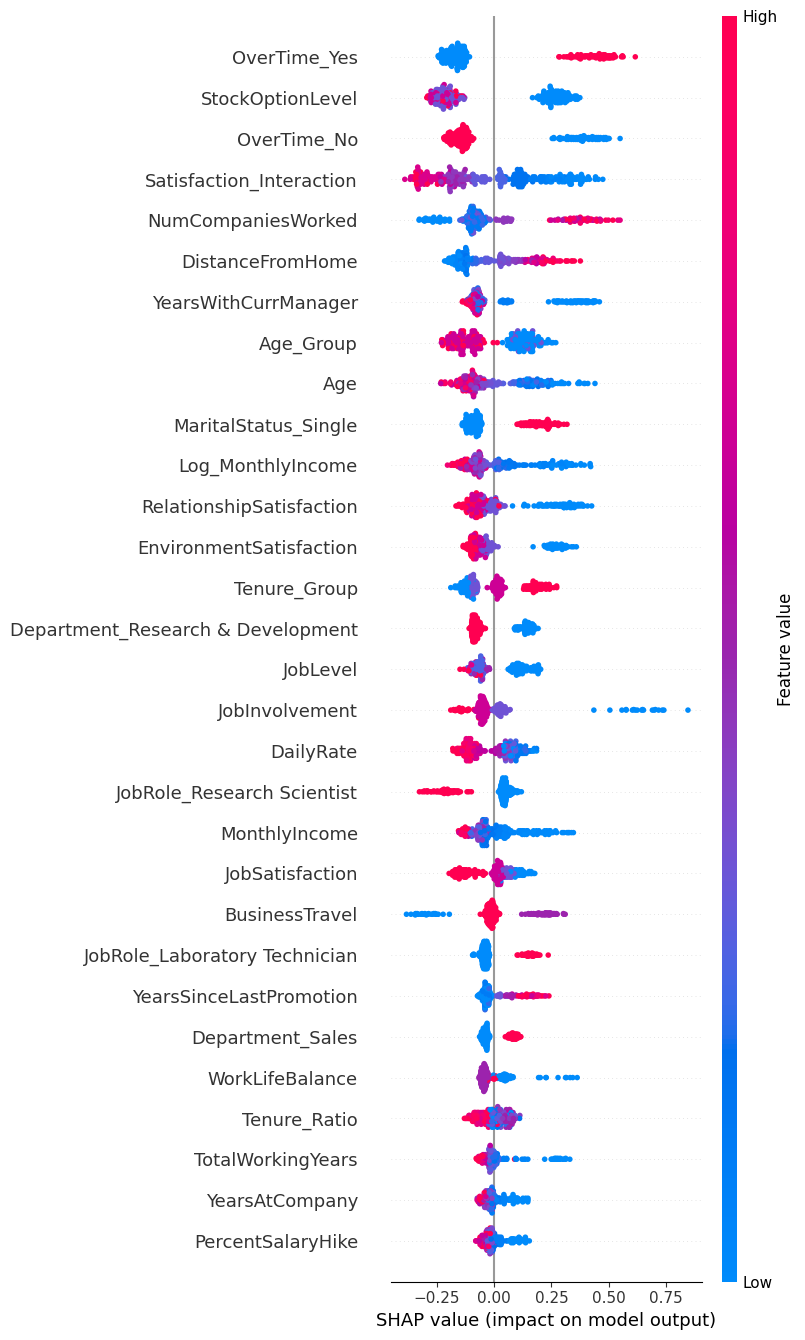

In [47]:
# Explainer
explainer = shap.TreeExplainer(best_cat)

# SHAP
shap_values = explainer.shap_values(X_test)
shap.summary_plot(
    shap_values,
    X_test,
    max_display=30
)




# Deployment

## Which Models to Select?

I think it is better to give option to user. So i create a model registry and give choice to user.

In [48]:
MODEL_REGISTRY = {
    "1": {
        "name": "CatBoost",
        "model": best_cat,
        "threshold": cv_threshold_cat,
        "type": "proba"
    },
    "2": {
        "name": "Logistic Regression",
        "model": best_logreg,
        "threshold": cv_threshold,
        "type": "proba"
    },
    "3": {
        "name": "SVC",
        "model": best_svc,
        "threshold": cv_threshold_svc,
        "type": "decision"
    }
}


In [49]:
def select_model(model_registry=MODEL_REGISTRY):
    print("\nLütfen tahminleme için bir model seçiniz:")
    print("-------------------------------------------------")
    
    for key, cfg in model_registry.items():
        print(f"[{key}] {cfg['name']}")
    
    print("-------------------------------------------------")
    choice = input("Seçiminiz: ").strip()

    if choice not in model_registry:
        print("\n!! Geçersiz seçim. Varsayılan model kullanılıyor.")
        choice = "1"

    selected = model_registry[choice]

    print(f"\n>> Seçilen Model: {selected['name']}")
    print(f">> Kullanılan Threshold: {selected['threshold']}\n")

    return selected
def predict_with_threshold(model_cfg, X):
    model = model_cfg["model"]
    threshold = model_cfg["threshold"]

    if model_cfg["type"] == "proba":
        scores = model.predict_proba(X)[:, 1]
    else:  # decision_function
        scores = model.decision_function(X)

    y_pred = (scores >= threshold).astype(int)
    return y_pred, scores


In [50]:
"""selected_model_cfg = select_model()

y_pred, scores = predict_with_threshold(selected_model_cfg, X_test)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, scores))"""

'selected_model_cfg = select_model()\n\ny_pred, scores = predict_with_threshold(selected_model_cfg, X_test)\n\nprint(classification_report(y_test, y_pred))\nprint("ROC-AUC:", roc_auc_score(y_test, scores))'

# Evaluation and Discussion

Things that can be done to reduce employee attrition rates.
*  Increase Satisfaction Interactions
*  Decrease Overtimes
*  Increase Stock Option Levels
*  Increase Monthly Rates
*  Increase Job Involvement of employees.
     
Things to consider for low attrition when hiring new employees:
*    Selecting employees have not high amount number of companies worked at
*    Selecting more experienced and old employees
*    Selecting married employees